# Data Expo 2009 - Airline on-time performance
## by Abdalla Mohamed

## Preliminary Wrangling
> This dataset is taken from the American Statistical Association (ASA) [webiste](https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009). Every year the ASA organizes a data science challenge called Data Expo where a raw dataset is provided for analyses. This dataset is from the Data Expo 2009 challenge where the dataset represents Airline on-time performance. It is a collection of all domestic US flights operated by major carriers and collects data points such as: actual departure time, scheduled departure time, airline carrier, flight number, air time, origin airport, destination airport, was the flight cancelled, reason for cancellation and so on. The data provided starts from the year 1987 and goes up to 2008. For this project, only year 2005 will be analyzed. The zipped file for all years can be downloaded [here](http://ww2.amstat.org/sections/graphics/datasets/DataExpo2009.zip)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('2005.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0


### What is the structure of your dataset?

In [3]:
print('The dataframe shape is: {}\n'.format(df.shape))
df.info()

The dataframe shape is: (7140596, 29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140596 entries, 0 to 7140595
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     int64  
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDela

There are 29 variables, mostly numeric and some categorical. 

In [4]:
# display all columns
pd.set_option('display.max_columns', None)

### What is/are the main feature(s) of interest in your dataset?

> Being able to predict the on time performance of a particular flight on a certain day for American Airlines

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the day of week and departure times to have the biggest effect on flight delays. I suspect weekends or days with more flights may suffer from delays due to a larger workload for staff to turn around a higher volume of aircrafts 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

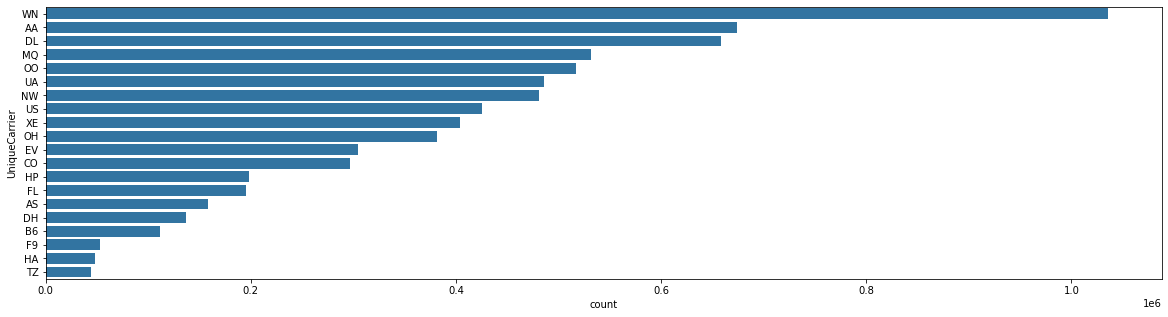

In [5]:
# lets take a look at the number of flights per carrier
plt.figure(figsize=[20,5])
order = df.UniqueCarrier.value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='UniqueCarrier', order = order, color=base_color);

We can see the airline with the most flights is carrier "WN" which is the identifier for Southwest Airlines.
For this analysis we will only take a look at American Airlines flights, so we will create a subset of this data called "df_aa"

In [44]:
df_aa = df[df['UniqueCarrier']=='AA'].reset_index(drop=True)
df_aa

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,1,6,901.0,900,1214.0,1210,AA,1,N338AA,373.0,370,338.0,4.0,1.0,JFK,LAX,2475,8,27,0,NaN,0,0,0,0,0,0
1,2005,1,2,7,855.0,900,1236.0,1210,AA,1,N323AA,401.0,370,349.0,26.0,-5.0,JFK,LAX,2475,34,18,0,NaN,0,0,0,26,0,0
2,2005,1,3,1,901.0,900,1238.0,1210,AA,1,N336AA,397.0,370,370.0,28.0,1.0,JFK,LAX,2475,12,15,0,NaN,0,0,0,28,0,0
3,2005,1,4,2,856.0,900,1306.0,1210,AA,1,N327AA,430.0,370,350.0,56.0,-4.0,JFK,LAX,2475,39,41,0,NaN,0,0,0,56,0,0
4,2005,1,5,3,857.0,900,1154.0,1210,AA,1,N327AA,357.0,370,335.0,-16.0,-3.0,JFK,LAX,2475,8,14,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673564,2005,12,27,2,1525.0,1525,1711.0,1654,AA,2520,N408AA,106.0,89,61.0,17.0,0.0,BTR,DFW,383,29,16,0,NaN,0,0,0,17,0,0
673565,2005,12,28,3,1535.0,1525,1700.0,1654,AA,2520,N499AA,85.0,89,65.0,6.0,10.0,BTR,DFW,383,12,8,0,NaN,0,0,0,0,0,0
673566,2005,12,29,4,1517.0,1525,1650.0,1654,AA,2520,N221AA,93.0,89,71.0,-4.0,-8.0,BTR,DFW,383,9,13,0,NaN,0,0,0,0,0,0
673567,2005,12,30,5,1525.0,1525,1647.0,1654,AA,2520,N430AA,82.0,89,60.0,-7.0,0.0,BTR,DFW,383,14,8,0,NaN,0,0,0,0,0,0


The new subset of data has 673,569 records for the year 2005. 

In [45]:
# check to see if any null cells
df_aa.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                9752
CRSDepTime                0
ArrTime               11469
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime     11469
CRSElapsedTime            0
AirTime               11469
ArrDelay              11469
DepDelay               9752
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode     663817
Diverted                  0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [46]:
# drop the rows that dont have data for Departure time
# drop rows that dont have data for Arrival time
df_aa = df_aa[df_aa.DepTime.notna()]
df_aa = df_aa[df_aa.ArrTime.notna()]

In [47]:
df_aa

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,1,6,901.0,900,1214.0,1210,AA,1,N338AA,373.0,370,338.0,4.0,1.0,JFK,LAX,2475,8,27,0,NaN,0,0,0,0,0,0
1,2005,1,2,7,855.0,900,1236.0,1210,AA,1,N323AA,401.0,370,349.0,26.0,-5.0,JFK,LAX,2475,34,18,0,NaN,0,0,0,26,0,0
2,2005,1,3,1,901.0,900,1238.0,1210,AA,1,N336AA,397.0,370,370.0,28.0,1.0,JFK,LAX,2475,12,15,0,NaN,0,0,0,28,0,0
3,2005,1,4,2,856.0,900,1306.0,1210,AA,1,N327AA,430.0,370,350.0,56.0,-4.0,JFK,LAX,2475,39,41,0,NaN,0,0,0,56,0,0
4,2005,1,5,3,857.0,900,1154.0,1210,AA,1,N327AA,357.0,370,335.0,-16.0,-3.0,JFK,LAX,2475,8,14,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673564,2005,12,27,2,1525.0,1525,1711.0,1654,AA,2520,N408AA,106.0,89,61.0,17.0,0.0,BTR,DFW,383,29,16,0,NaN,0,0,0,17,0,0
673565,2005,12,28,3,1535.0,1525,1700.0,1654,AA,2520,N499AA,85.0,89,65.0,6.0,10.0,BTR,DFW,383,12,8,0,NaN,0,0,0,0,0,0
673566,2005,12,29,4,1517.0,1525,1650.0,1654,AA,2520,N221AA,93.0,89,71.0,-4.0,-8.0,BTR,DFW,383,9,13,0,NaN,0,0,0,0,0,0
673567,2005,12,30,5,1525.0,1525,1647.0,1654,AA,2520,N430AA,82.0,89,60.0,-7.0,0.0,BTR,DFW,383,14,8,0,NaN,0,0,0,0,0,0


In [48]:
# check to confirm null cells are dropped
df_aa.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode     662100
Diverted                  0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [49]:
# change the data type for flight number to string
df_aa['FlightNum'] = df_aa['FlightNum'].astype(str)

# change the data type for DepTime to datetime
df_aa['DepTime'] = df_aa['DepTime'].astype(int)                     # convert to int to remove the ".0"
df_aa['DepTime'] = df_aa['DepTime'].astype(str).str.zfill(4)        # add leading zero if less than 4  digit 
df_aa['DepTime'] = df_aa['DepTime'].str[:2] + ':' + df_aa['DepTime'].str[2:]    # add ":" time seperator between hour and min
df_aa['DepTime'] = df_aa['DepTime'].str.replace('24','00')          # replace all hours that read 24 into 00
df_aa['DepTime'] = pd.to_datetime(df_aa['DepTime'], format = '%H:%M')



# change the data type for CRSDepTime to datetime
#df_aa['CRSDepTime'] = pd.to_datetime(df_aa['CRSDepTime'], infer_datetime_format=True)
df_aa['CRSDepTime'] = df_aa['CRSDepTime'].astype(int)                     # convert to int to remove the ".0"
df_aa['CRSDepTime'] = df_aa['CRSDepTime'].astype(str).str.zfill(4)        # add leading zero if less than 4  digit 
df_aa['CRSDepTime'] = df_aa['CRSDepTime'].str[:2] + ':' + df_aa['CRSDepTime'].str[2:]    # add ":" time seperator between hour and min
df_aa['CRSDepTime'] = df_aa['CRSDepTime'].str.replace('24','00')          # replace all hours that read 24 into 00
df_aa['CRSDepTime'] = pd.to_datetime(df_aa['CRSDepTime'], format = '%H:%M')

# change the data type for ArrTime to datetime
#df_aa['ArrTime'] = df_aa['ArrTime'].datetime.strptime(start,"%H:%M").time()
df_aa['ArrTime'] = df_aa['ArrTime'].astype(int)                     # convert to int to remove the ".0"
df_aa['ArrTime'] = df_aa['ArrTime'].astype(str).str.zfill(4)        # add leading zero if less than 4  digit 
df_aa['ArrTime'] = df_aa['ArrTime'].str[:2] + ':' + df_aa['ArrTime'].str[2:]    # add ":" time seperator between hour and min
df_aa['ArrTime'] = df_aa['ArrTime'].str.replace('24','00')          # replace all hours that read 24 into 00
df_aa['ArrTime'] = pd.to_datetime(df_aa['ArrTime'], format = '%H:%M')


# change the data type for CRSArrTime to datetime
#df_aa['CRSArrTime'] = df_aa['CRSArrTime'].datetime.strptime(start,"%H:%M").time()
df_aa['CRSArrTime'] = df_aa['CRSArrTime'].astype(int)                     # convert to int to remove the ".0"
df_aa['CRSArrTime'] = df_aa['CRSArrTime'].astype(str).str.zfill(4)        # add leading zero if less than 4  digit 
df_aa['CRSArrTime'] = df_aa['CRSArrTime'].str[:2] + ':' + df_aa['CRSArrTime'].str[2:]    # add ":" time seperator between hour and min
df_aa['CRSArrTime'] = df_aa['CRSArrTime'].str.replace('24','00')          # replace all hours that read 24 into 00
df_aa['CRSArrTime'] = pd.to_datetime(df_aa['CRSArrTime'], format = '%H:%M')

In [810]:
# create dataframe for Dallas Fort worth Outbound American Airlines flights 
dfw_outbound = df_aa.query('Origin == "DFW" ')
# convert to datetime
dfw_outbound.loc['DepTime'] = pd.to_datetime(dfw_outbound['DepTime'], format = '%H:%M').dt.strftime("%H:%M")
dfw_outbound.loc['CRSDepTime'] = pd.to_datetime(dfw_outbound['CRSDepTime'], format = '%H:%M').dt.strftime("%H:%M")
dfw_outbound.loc['ArrTime'] = pd.to_datetime(dfw_outbound['ArrTime'], format = '%H:%M').dt.strftime("%H:%M")
dfw_outbound.loc['CRSArrTime'] = pd.to_datetime(dfw_outbound['CRSArrTime'], format = '%H:%M').dt.strftime("%H:%M")

# create dataframe for Dallas Fort worth Inbound American Airlines flights 
dfw_inbound = df_aa.query('Dest == "DFW" ')
# convert to datetime
dfw_inbound.loc['DepTime'] = pd.to_datetime(dfw_inbound['DepTime'], format = '%H:%M').dt.strftime("%H:%M")
dfw_inbound.loc['CRSDepTime'] = pd.to_datetime(dfw_inbound['CRSDepTime'], format = '%H:%M').dt.strftime("%H:%M")
dfw_inbound.loc['ArrTime'] = pd.to_datetime(dfw_inbound['ArrTime'], format = '%H:%M').dt.strftime("%H:%M")
dfw_inbound.loc['CRSArrTime'] = pd.to_datetime(dfw_inbound['CRSArrTime'], format = '%H:%M').dt.strftime("%H:%M")

C:\Users\abdal\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [811]:
dfw_outbound.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164603 entries, 124 to CRSArrTime
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               164599 non-null  float64
 1   Month              164599 non-null  float64
 2   DayofMonth         164599 non-null  float64
 3   DayOfWeek          164599 non-null  float64
 4   DepTime            164599 non-null  object 
 5   CRSDepTime         164599 non-null  object 
 6   ArrTime            164599 non-null  object 
 7   CRSArrTime         164599 non-null  object 
 8   UniqueCarrier      164599 non-null  object 
 9   FlightNum          164599 non-null  object 
 10  TailNum            164599 non-null  object 
 11  ActualElapsedTime  164599 non-null  float64
 12  CRSElapsedTime     164599 non-null  float64
 13  AirTime            164599 non-null  float64
 14  ArrDelay           164599 non-null  float64
 15  DepDelay           164599 non-null  float64
 16  O

In [25]:
# check to see the data type has been changed 
df_aa.dtypes

Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
DepTime              datetime64[ns]
CRSDepTime           datetime64[ns]
ArrTime              datetime64[ns]
CRSArrTime           datetime64[ns]
UniqueCarrier                object
FlightNum                    object
TailNum                      object
ActualElapsedTime           float64
CRSElapsedTime                int64
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                        int64
TaxiOut                       int64
Cancelled                     int64
CancellationCode             object
Diverted                      int64
CarrierDelay                  int64
WeatherDelay                  int64
NASDelay                      int64
SecurityDelay               

In [13]:
df_aa

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,1,6,09:01,09:00,12:14,12:10,AA,1,N338AA,373.0,370,338.0,4.0,1.0,JFK,LAX,2475,8,27,0,NaN,0,0,0,0,0,0
1,2005,1,2,7,08:55,09:00,12:36,12:10,AA,1,N323AA,401.0,370,349.0,26.0,-5.0,JFK,LAX,2475,34,18,0,NaN,0,0,0,26,0,0
2,2005,1,3,1,09:01,09:00,12:38,12:10,AA,1,N336AA,397.0,370,370.0,28.0,1.0,JFK,LAX,2475,12,15,0,NaN,0,0,0,28,0,0
3,2005,1,4,2,08:56,09:00,13:06,12:10,AA,1,N327AA,430.0,370,350.0,56.0,-4.0,JFK,LAX,2475,39,41,0,NaN,0,0,0,56,0,0
4,2005,1,5,3,08:57,09:00,11:54,12:10,AA,1,N327AA,357.0,370,335.0,-16.0,-3.0,JFK,LAX,2475,8,14,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673564,2005,12,27,2,15:25,15:25,17:11,16:54,AA,2520,N408AA,106.0,89,61.0,17.0,0.0,BTR,DFW,383,29,16,0,NaN,0,0,0,17,0,0
673565,2005,12,28,3,15:35,15:25,17:00,16:54,AA,2520,N499AA,85.0,89,65.0,6.0,10.0,BTR,DFW,383,12,8,0,NaN,0,0,0,0,0,0
673566,2005,12,29,4,15:17,15:25,16:50,16:54,AA,2520,N221AA,93.0,89,71.0,-4.0,-8.0,BTR,DFW,383,9,13,0,NaN,0,0,0,0,0,0
673567,2005,12,30,5,15:25,15:25,16:47,16:54,AA,2520,N430AA,82.0,89,60.0,-7.0,0.0,BTR,DFW,383,14,8,0,NaN,0,0,0,0,0,0


In [14]:
# find the frequency of each flight number
df_aa.FlightNum.value_counts()

676     728
855     725
285     724
1503    720
283     720
       ... 
2615      1
2706      1
2578      1
2603      1
2508      1
Name: FlightNum, Length: 2201, dtype: int64

In [15]:
# this is a list of 2201 flights
# we can reduce this by selecting flights originating from Dallas- Fort Worth Airport, "DFW" 

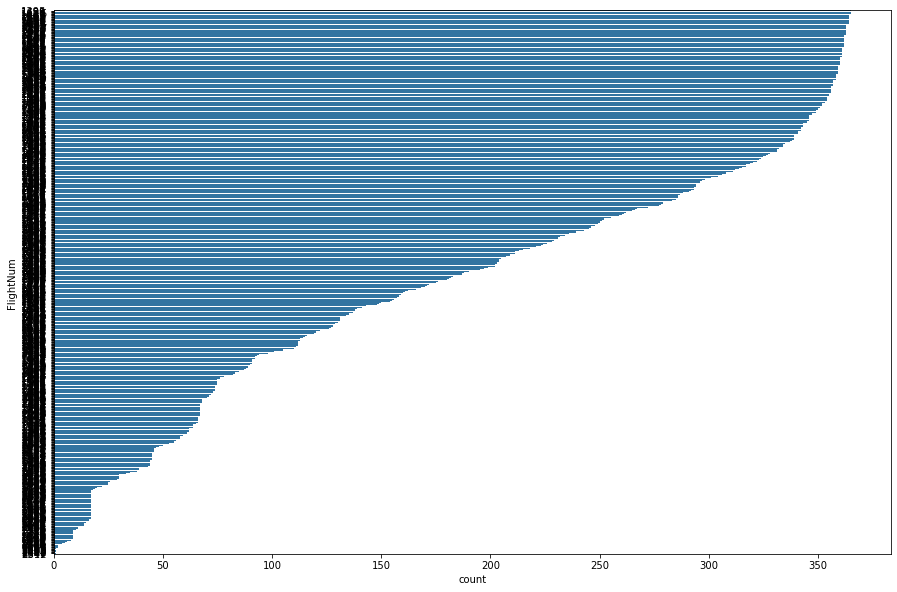

In [778]:
# lets take a look at the frequency of American Airlines flights outbound from DFW airport
plt.figure(figsize=[15, 10])
base_color = sb.color_palette()[0]

# Select flights originating at DFW airport code
dfw_outbound = df_aa.query('Origin == "DFW" ')

order = dfw_outbound.FlightNum.value_counts().index

sb.countplot(data=dfw_outbound, y='FlightNum', order=order, color=base_color);

> We can see that there is a wide range of flight frequncies, some fly out of DFW airport daily and some only once a year. A good proportion fly almost daily

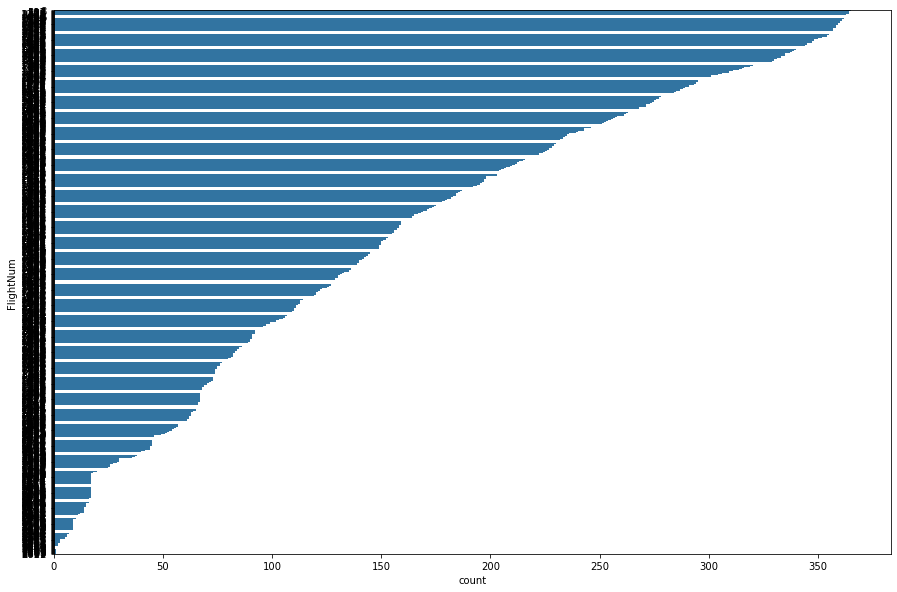

In [779]:
# lets take a look at the frequency of American Airlines inbound to DFW airport
plt.figure(figsize=[15, 10])
base_color = sb.color_palette()[0]

# Select flights originating at DFW airport code
dfw_inbound = df_aa.query('Dest == "DFW" ')

order = dfw_inbound.FlightNum.value_counts().index

sb.countplot(data=dfw_inbound, y='FlightNum', order=order, color=base_color);

> We see the flights frequency also has a wide range with some flights flying into DFW daily and and others just once a year. There is a smaller portion which fly almost daily compared to the outbound flights

In [780]:
# create a datafram that combines all DFW flights, both inbond and outbound
dfw = [dfw_inbound, dfw_outbound]
dfw = pd.concat(dfw)
dfw

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
155,2005,1,1,6,17:56,18:00,04:43,04:59,AA,6,N343AA,407.0,419,392.0,-16.0,-4.0,OGG,DFW,3711,5,10,0,NaN,0,0,0,0,0,0
156,2005,1,2,7,17:57,18:00,04:45,04:59,AA,6,N394AA,408.0,419,386.0,-14.0,-3.0,OGG,DFW,3711,9,13,0,NaN,0,0,0,0,0,0
157,2005,1,3,1,18:00,18:00,05:06,04:59,AA,6,N354AA,426.0,419,388.0,7.0,0.0,OGG,DFW,3711,7,31,0,NaN,0,0,0,0,0,0
158,2005,1,4,2,18:09,18:00,04:26,04:59,AA,6,N354AA,377.0,419,361.0,-33.0,9.0,OGG,DFW,3711,6,10,0,NaN,0,0,0,0,0,0
159,2005,1,5,3,18:25,18:00,04:44,04:59,AA,6,N347AA,379.0,419,365.0,-15.0,25.0,OGG,DFW,3711,5,9,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673534,2005,12,27,2,13:00,13:26,14:35,14:42,AA,2519,N408AA,71.0,76,54.0,-7.0,-2.0,DFW,BTR,383,2,15,0,NaN,0,0,0,0,0,0
673535,2005,12,28,3,13:50,13:26,15:00,14:42,AA,2519,N499AA,70.0,76,53.0,18.0,24.0,DFW,BTR,383,3,14,0,NaN,0,14,0,0,0,4
673536,2005,12,29,4,13:20,13:26,14:34,14:42,AA,2519,N221AA,74.0,76,54.0,-8.0,-6.0,DFW,BTR,383,6,14,0,NaN,0,0,0,0,0,0
673537,2005,12,30,5,13:00,13:26,14:35,14:42,AA,2519,N430AA,71.0,76,55.0,-7.0,-2.0,DFW,BTR,383,4,12,0,NaN,0,0,0,0,0,0


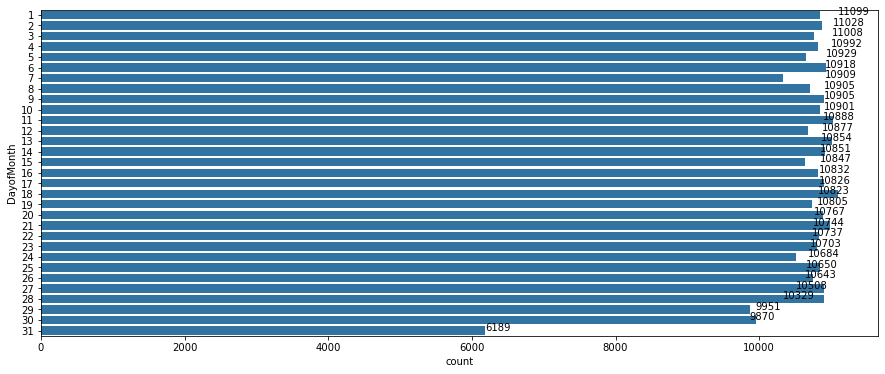

In [781]:
# lets take a look at the frequency of flights by day of month
dom = dfw.DayofMonth.value_counts()
base_color = sb.color_palette()[0]
#order = dfw.DayofMonth.value_counts().index

plt.figure(figsize=[15,6])
sb.countplot(data=dfw, y='DayofMonth', color=base_color)
for index, value in enumerate(dom):
    plt.text(value, index, str(value));

> The order of the days of the months were kept as they are since they have an inherent order. It is expected for the 31st day to have the leaste amount of flights since not all months have 31 days. The maximum flights occur on the 11th day of the month. Next it would be interesting to see the flight frequency by month

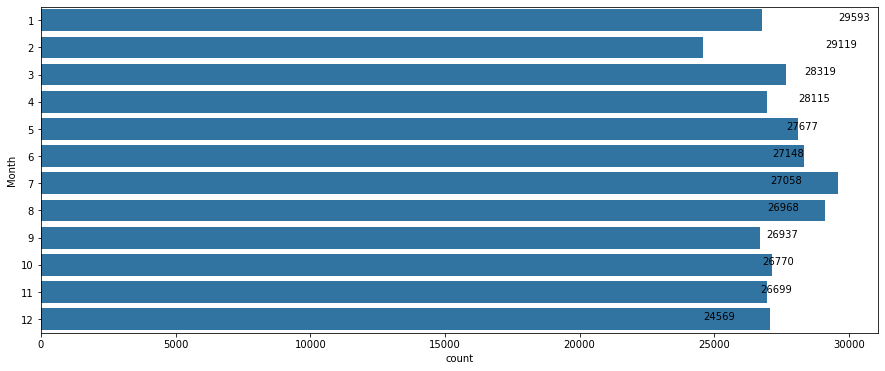

In [782]:
# lets take a look at the frequency of flights by month
month = dfw.Month.value_counts()
base_color = sb.color_palette()[0]
#order = dfw.Month.value_counts().index

plt.figure(figsize=[15,6])
sb.countplot(data=dfw, y='Month', color=base_color)
for index, value in enumerate(month):
    plt.text(value, index, str(value));

> The order of the months are kept as is since there is an inherent order in months. July and August are the months with the most frequent flights. Next it would be interesting to see flight frequency by day of week

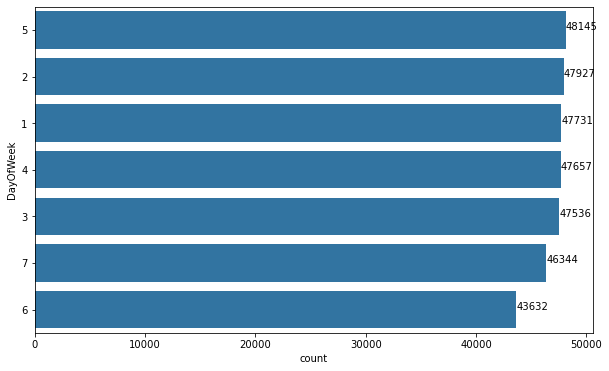

In [783]:
# lets take a look at the frequency of flights by day of week
dow = dfw.DayOfWeek.value_counts()
base_color = sb.color_palette()[0]
order = dfw.DayOfWeek.value_counts().index

plt.figure(figsize=[10,6])
sb.countplot(data=dfw, y='DayOfWeek',order=order, color=base_color)
for index, value in enumerate(dow):
    plt.text(value, index, str(value));

> We see that week days 2,3,5,1, and 4 have roughly the same number of flights where days 7 and 6 have less flights throughout the year. Next It would be interesting to see on which days do we have the most delays

>1: Monday,
2: Tuesday,
3: Wednesday,
4: Thursday,
5: Friday,
6: Saturday,
7: Sunday

> Now lets take a look at the frequency of delays for American Airlines inbound and outbound flights to DFW airport

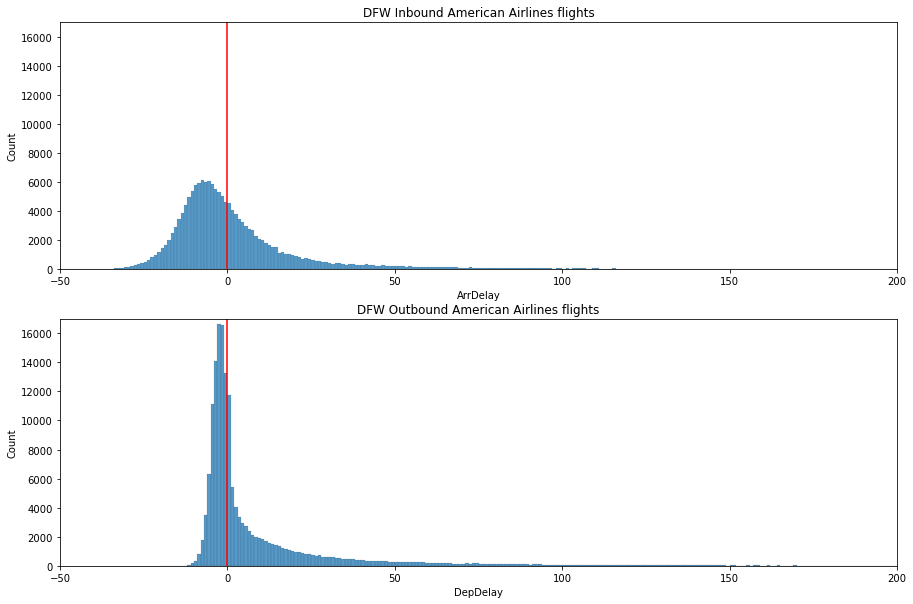

In [826]:
# combine inbound and outbound onto one plot
plt.figure(figsize=[15,10])

# lets take a look at arrival delays for DFW inbound flights
plt.subplot(2,1,1)
bins = np.arange(dfw_inbound.ArrDelay.min(), dfw_inbound.ArrDelay.max()+1, 1) 
sb.histplot(data=dfw_inbound, x='ArrDelay', bins = bins)
plt.xlim([-50,200])
plt.ylim([0,17000])
plt.axvline(x=0, color='r')
plt.title('DFW Inbound American Airlines flights');

# Lets take a look at departure delays for DFW outbound flights
plt.subplot(2,1,2)
bins = np.arange(dfw_outbound.DepDelay.min(), dfw_outbound.DepDelay.max()+1, 1)
sb.histplot(data=dfw_outbound, x='DepDelay', bins = bins)
plt.xlim([-50,200])
plt.ylim([0,17000])
plt.axvline(x=0, color='r')
plt.title('DFW Outbound American Airlines flights');

> For inbound flights, we observe that the majority of flights arrived earlier than scheduduled, or on time. The majority of delayed flights are within 60 mins of delays. We also observe that the majority of flights arrive by up to 30 minutes earlier   

> For outbound flights, we observe that the majority of flights depart earlier than scheduled, or on time. The majority of delayed flights are within 60 minutes of delay. We also observe that the majority of flights depart by 20 minutes early

> Each box on the histigram represents a 1 minute interval

> We observe that for outbound flights, the frequency is a lot more precise than spreadout compared to inbound flights. The mode frequency for outbound flights is arounf 17,000 where inbound mode frequcncy is around 6,000

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The data types for FlightNum were changed to string. And the data types for: DepTime, CRSDepTime, ArrTime, CRSArrTime where changed to datetime 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the frequency of delayed inbound and outbound flights, the x-axis limits were changed since the data was skewed to the right. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [29]:
# Does time of day effect delays?


# combine inbound and outbound onto one plot
plt.figure(figsize=[15,10])

# plot departure time vs departure delay
plt.subplot(2,1,1)
#bins = df_aa.CRSDepTime.groupby(df_aa.CRSDepTime.dt.to_period('H'))
#bins = df_aa.resample('H', on='CRSDepTime')
plt.hist(data=df_aa, x='CRSDepTime', y='DepDelay', alpha=.1, bins = 24);

# plot arrival time vs arrival delay
plt.subplot(2,1,2)
#bins = df_aa.CRSArrTime.groupby(df_aa.CRSArrTime.dt.to_period('H'))
#bins = df_aa.resample('H', on='CRSDepTime')
plt.hist(data=df_aa, x='CRSArrTime', y='ArrDelay', alpha=.1, bins = 24);

TypeError: can only concatenate str (not "numpy.float64") to str

ConversionError: Failed to convert value(s) to axis units: 'DepDelay'

<Figure size 1080x720 with 1 Axes>

> 

In [50]:
df_aa

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,1,6,1900-01-01 09:01:00,1900-01-01 09:00:00,1900-01-01 12:14:00,1900-01-01 12:10:00,AA,1,N338AA,373.0,370,338.0,4.0,1.0,JFK,LAX,2475,8,27,0,NaN,0,0,0,0,0,0
1,2005,1,2,7,1900-01-01 08:55:00,1900-01-01 09:00:00,1900-01-01 12:36:00,1900-01-01 12:10:00,AA,1,N323AA,401.0,370,349.0,26.0,-5.0,JFK,LAX,2475,34,18,0,NaN,0,0,0,26,0,0
2,2005,1,3,1,1900-01-01 09:01:00,1900-01-01 09:00:00,1900-01-01 12:38:00,1900-01-01 12:10:00,AA,1,N336AA,397.0,370,370.0,28.0,1.0,JFK,LAX,2475,12,15,0,NaN,0,0,0,28,0,0
3,2005,1,4,2,1900-01-01 08:56:00,1900-01-01 09:00:00,1900-01-01 13:06:00,1900-01-01 12:10:00,AA,1,N327AA,430.0,370,350.0,56.0,-4.0,JFK,LAX,2475,39,41,0,NaN,0,0,0,56,0,0
4,2005,1,5,3,1900-01-01 08:57:00,1900-01-01 09:00:00,1900-01-01 11:54:00,1900-01-01 12:10:00,AA,1,N327AA,357.0,370,335.0,-16.0,-3.0,JFK,LAX,2475,8,14,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673564,2005,12,27,2,1900-01-01 15:25:00,1900-01-01 15:25:00,1900-01-01 17:11:00,1900-01-01 16:54:00,AA,2520,N408AA,106.0,89,61.0,17.0,0.0,BTR,DFW,383,29,16,0,NaN,0,0,0,17,0,0
673565,2005,12,28,3,1900-01-01 15:35:00,1900-01-01 15:25:00,1900-01-01 17:00:00,1900-01-01 16:54:00,AA,2520,N499AA,85.0,89,65.0,6.0,10.0,BTR,DFW,383,12,8,0,NaN,0,0,0,0,0,0
673566,2005,12,29,4,1900-01-01 15:17:00,1900-01-01 15:25:00,1900-01-01 16:50:00,1900-01-01 16:54:00,AA,2520,N221AA,93.0,89,71.0,-4.0,-8.0,BTR,DFW,383,9,13,0,NaN,0,0,0,0,0,0
673567,2005,12,30,5,1900-01-01 15:25:00,1900-01-01 15:25:00,1900-01-01 16:47:00,1900-01-01 16:54:00,AA,2520,N430AA,82.0,89,60.0,-7.0,0.0,BTR,DFW,383,14,8,0,NaN,0,0,0,0,0,0


In [51]:
df_aa.dtypes

Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
DepTime              datetime64[ns]
CRSDepTime           datetime64[ns]
ArrTime              datetime64[ns]
CRSArrTime           datetime64[ns]
UniqueCarrier                object
FlightNum                    object
TailNum                      object
ActualElapsedTime           float64
CRSElapsedTime                int64
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                        int64
TaxiOut                       int64
Cancelled                     int64
CancellationCode             object
Diverted                      int64
CarrierDelay                  int64
WeatherDelay                  int64
NASDelay                      int64
SecurityDelay               

In [60]:
df_aa.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,1,6,09:01,1900-01-01 09:00:00,1900-01-01 12:14:00,1900-01-01 12:10:00,AA,1,N338AA,373.0,370,338.0,4.0,1.0,JFK,LAX,2475,8,27,0,NaN,0,0,0,0,0,0
1,2005,1,2,7,08:55,1900-01-01 09:00:00,1900-01-01 12:36:00,1900-01-01 12:10:00,AA,1,N323AA,401.0,370,349.0,26.0,-5.0,JFK,LAX,2475,34,18,0,NaN,0,0,0,26,0,0
2,2005,1,3,1,09:01,1900-01-01 09:00:00,1900-01-01 12:38:00,1900-01-01 12:10:00,AA,1,N336AA,397.0,370,370.0,28.0,1.0,JFK,LAX,2475,12,15,0,NaN,0,0,0,28,0,0
3,2005,1,4,2,08:56,1900-01-01 09:00:00,1900-01-01 13:06:00,1900-01-01 12:10:00,AA,1,N327AA,430.0,370,350.0,56.0,-4.0,JFK,LAX,2475,39,41,0,NaN,0,0,0,56,0,0
4,2005,1,5,3,08:57,1900-01-01 09:00:00,1900-01-01 11:54:00,1900-01-01 12:10:00,AA,1,N327AA,357.0,370,335.0,-16.0,-3.0,JFK,LAX,2475,8,14,0,NaN,0,0,0,0,0,0


In [ ]:
df_aa.DepTime = df_aa.DepTime.dt.strftime("%H:%M")

In [63]:
df_aa.dtypes

Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
DepTime                      object
CRSDepTime           datetime64[ns]
ArrTime              datetime64[ns]
CRSArrTime           datetime64[ns]
UniqueCarrier                object
FlightNum                    object
TailNum                      object
ActualElapsedTime           float64
CRSElapsedTime                int64
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                        int64
TaxiOut                       int64
Cancelled                     int64
CancellationCode             object
Diverted                      int64
CarrierDelay                  int64
WeatherDelay                  int64
NASDelay                      int64
SecurityDelay               

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!